# **Housing price prediction**

# Project Code: DA-12
 *Name : Aarati Shah*

 *Roll No : 23CS60A01*

Import the necessary libraries to implement the project.

And load the data set.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy import mean
from sklearn.model_selection import cross_val_score

In [ ]:
#Load the data set
df = pd.read_csv('Housing.csv')

NameError: name 'pd' is not defined

# Analyze the dataset statistics and provide some fist level insights



Here we analyze the data statistics

Get some 1st level insights about the dataframe



In [ ]:
#printing the shape, size, the features, the data set
#Analysizing the data set
print(df.shape)
print(df.columns)

(545, 13)
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
# find the number of classes of furnishingstatus
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
#converting the string values of some features to numerical values
df['mainroad']=df['mainroad'].replace('yes', 1)
df['mainroad']=df['mainroad'].replace('no', 0)
df['guestroom']=df['guestroom'].replace('yes', 1)
df['guestroom']=df['guestroom'].replace('no', 0)
df['basement']=df['basement'].replace('yes', 1)
df['basement']=df['basement'].replace('no', 0)
df['hotwaterheating']=df['hotwaterheating'].replace('yes', 1)
df['hotwaterheating']=df['hotwaterheating'].replace('no', 0)
df['airconditioning']=df['airconditioning'].replace('yes', 1)
df['airconditioning']=df['airconditioning'].replace('no', 0)
df['prefarea']=df['prefarea'].replace('yes', 1)
df['prefarea']=df['prefarea'].replace('no', 0)
df['furnishingstatus']=df['furnishingstatus'].replace('furnished', 2)
df['furnishingstatus']=df['furnishingstatus'].replace('semi-furnished', 1)
df['furnishingstatus']=df['furnishingstatus'].replace('unfurnished', 0)

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [ ]:
y=df['price']
# remove the target varible from the dataset
#put the features data set in X ( a new dataframe)
X=df.drop('price', axis=1)

In [ ]:
df.corr()['price'].sort_values(ascending = False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64

#Use feature selection techniques to remove at least two features from the dataset

Use the corelation matrix for the removal of the at least two features from the dataset.

Remove the features which is having high corelation value.

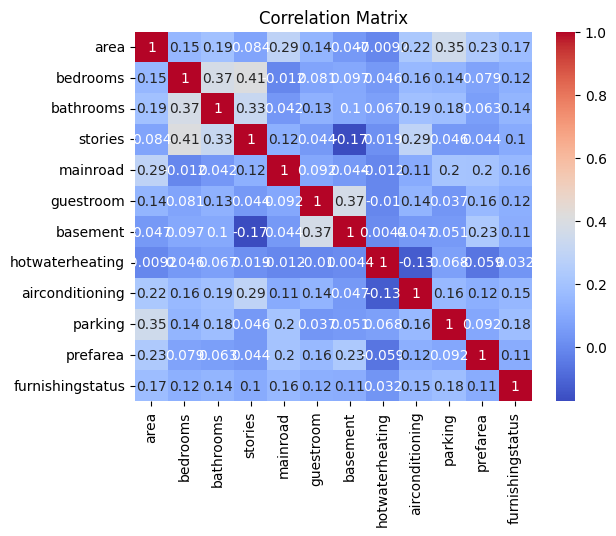

In [ ]:
#using corelation matrix

correlation_matrix = X.corr()

# Display of correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#identify the features which are highly corelated
cor_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.37:
            col_name = correlation_matrix.columns[i]
            cor_features.add(col_name)

In [ ]:
print(cor_features)

{'basement', 'bathrooms', 'stories'}


In [ ]:
# Remove at least two highly correlated features
# removes the  cor_features from X
X = X.drop(cor_features, axis=1)

# Use feature extraction to generate a new feature

In [ ]:
#feature extraction to generate a new feature
#using PCA
pca = PCA(n_components=1)
feature1 = pca.fit_transform(X)

# Add the new feature to the dataframe
X['new_feature'] = feature1

In [ ]:
#analyze the modified dataframe
print(X.shape)
X.describe()

(545, 10)


,area,bedrooms,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,new_feature
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,0.858716,0.177982,0.045872,0.315596,0.693578,0.234862,0.930275,-2.136061e-13
std,2170.141023,0.738064,0.348635,0.382849,0.209399,0.465180,0.861586,0.424302,0.761373,2.170141e+03
min,1650.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.500541e+03
25%,3600.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.550541e+03
50%,4600.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.505414e+02
75%,6360.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.209459e+03
max,16200.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.104946e+04


# Polynomial regression for Housing price prediction

Here we use K-Fold Cross validation method for Test and Train split of the data. We get the best results for the data set using R^2 (coefficient of determination) regression score of function.

In [ ]:
# K-Fold Cross validation method for Test and Train split of the data
kf = KFold(n_splits=5,shuffle=True, random_state=42)
best_degree = None
best_r2 = 0  # Initialize with a lower value
best_score = 0  # Initialize with a lower value

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Polynomial regression with multiple polynomial degrees
    #for Housing price prediction
    degrees = [1, 2]

    r2_values = []
    score_values = []

    for i in degrees:
        poly_features = PolynomialFeatures(degree=i)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # calculate score
        score = model.score(X_train_poly, y_train)

        # Make predictions
        y_pred = model.predict(X_test_poly)

        # calculatr R2
        r2 = r2_score(y_test, y_pred,sample_weight=None, multioutput=None)

        #print the R2, and score for each degree
        print(f'Degree: {i} Score : {score} r2 :{r2}')

        r2_values.append(r2)
        score_values.append(score)

    # state which dataset gives the best results
    average_r2 = np.mean(r2_values)
    average_score = np.mean(score_values)

    if average_r2 > best_r2:
        best_r2 = average_r2
        best_degree = i
        best_score = average_score

print('-----------------------------------------------------------')
print(f'Best Model - Degree : {best_degree}: R2 : {best_r2}, score : {best_score}')



Degree: 1 Score : 0.5692077851995658 r2 :0.5591525307097189
Degree: 2 Score : 0.6602068148341165 r2 :0.6014831918938537
Degree: 1 Score : 0.5403283184433274 r2 :0.558380950710496
Degree: 2 Score : 0.6768949674726266 r2 :0.25635119486984137
Degree: 1 Score : 0.5997686983431885 r2 :0.20951364041514353
Degree: 2 Score : 0.6899319650914824 r2 :0.140949627225035
Degree: 1 Score : 0.5605846687416278 r2 :0.626510888239606
Degree: 2 Score : 0.6518217020164719 r2 :0.6100070542216373
Degree: 1 Score : 0.5771311974948866 r2 :0.5437584387735996
Degree: 2 Score : 0.666218471042541 r2 :0.5751481378384634
-----------------------------------------------------------
Best Model - Degree : 2: R2 : 0.6182589712306217, score : 0.6062031853790499


Text(0, 0.5, 'Predicted value')

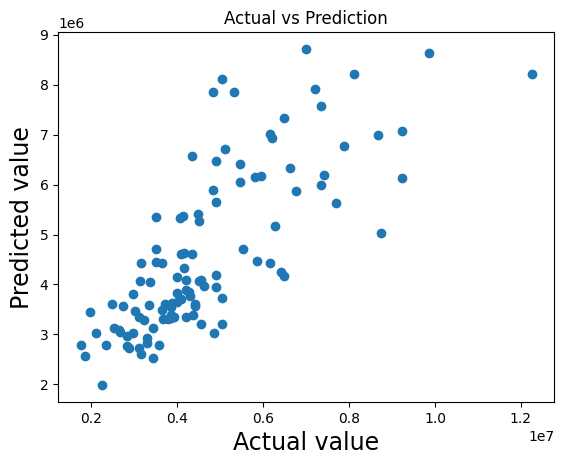

In [ ]:
# plot
fig = plt.figure()

# Scatter plot of the actual value vs predicted values
plt.scatter(y_test, y_pred)

plt.title('Actual vs Prediction')
plt.xlabel('Actual value', fontsize=17)
plt.ylabel('Predicted value', fontsize=17)